# 2.3 Lab: Introduction to Python

This notebook file is intended to be a translation of the R lab included in Chapter 2.


## Installation
There are multiple ways to get a notebook environment working. The easiest is probably to install Anaconda and work off of that premade setup.

However, I personally recommend using ASDF to install versions of Python and using Poetry to manage package dependencies. This is because I tend to use separate environments for each project I'm working on (including this one) and I previously had problems with `conda` installs.

Please look at the README.md in the base of the repository to see how to install things.


## 2.3.1 Basic Commands
Python is handy but doesn't appear to have the same functionality as built into R. To better address matrix math and statistical calculations, I will be using numpy, pandas, and scipy (specifically the stats module from scipy)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

Python can use functions to perform operations. To run a function, you type `funcname` with its inputs in parenthesis. A function can have any number of inputs, and it is best practice to load the function's documentation to see specifics on how it operates. As an example, we will use numpy to create an array from 4 integers. If you want to see specific documentation on this function, you can checkout the `numpy.array` manual here: https://numpy.org/doc/stable/reference/generated/numpy.array.html 

In [2]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
          like=None)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
        If object is a scalar, a 0-dimensional array containing object is
        returned.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', '

In [3]:
x = np.array([1, 3, 2, 5])
print(x)

[1 3 2 5]


Let's create another array and perform some operations on them

In [4]:
y = np.array([1, 4, 3])
print(y)

[1 4 3]


In [5]:
# Here we'll use a built in Python function to tell us the about the arrays
len(x) # give us a count of elements inside the array

4

In [6]:
len(y)  # similarly with the vector y

3

The `dir()` function allows us to look at a list of all objects, such as data and functions, that are in our current scope. Basically, things we have saved so far. The `del` function can remove pointers to specific objects to free up memory.

In [7]:
help(dir)

Help on built-in function dir in module builtins:

dir(...)
    dir([object]) -> list of strings
    
    If called without an argument, return the names in the current scope.
    Else, return an alphabetized list of names comprising (some of) the attributes
    of the given object, and of attributes reachable from it.
    If the object supplies a method named __dir__, it will be used; otherwise
    the default dir() logic is used and returns:
      for a module object: the module's attributes.
      for a class object:  its attributes, and recursively the attributes
        of its bases.
      for any other object: its attributes, its class's attributes, and
        recursively the attributes of its class's base classes.



In [8]:
dir()

['In',
 'Out',
 '_',
 '_5',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'np',
 'os',
 'pd',
 'quit',
 'site',
 'stats',
 'sys',
 'x',
 'y']

In [9]:
all_vars = dir()
for name in all_vars:
    if not name.startswith('__'):
        print(eval(name))

['', 'import numpy as np\nimport pandas as pd\nfrom scipy import stats', 'help(np.array)', 'x = np.array([1, 3, 2, 5])\nprint(x)', 'y = np.array([1, 4, 3])\nprint(y)', "# Here we'll use a built in Python function to tell us the about the arrays\nlen(x) # give us a count of elements inside the array", 'len(y)  # similarly with the vector y', 'help(dir)', 'dir()', "all_vars = dir()\nfor name in all_vars:\n    if not name.startswith('__'):\n        print(eval(name))"]
{5: 4, 6: 3, 8: ['In', 'Out', '_', '_5', '_6', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'np', 'os', 'pd', 'quit', 'site', 'stats', 'sys', 'x', 'y']}
['In', 'Out', '_', '_5', '_6', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_i

In [10]:
# help(del)
# help(del) does not work like it does with other functions, not sure why, may be explained in base Python documentation

See https://docs.python.org/3/reference/simple_stmts.html#del

In [11]:
del x, y

In [12]:
dir()

['In',
 'Out',
 '_',
 '_5',
 '_6',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'all_vars',
 'exit',
 'get_ipython',
 'name',
 'np',
 'os',
 'pd',
 'quit',
 'site',
 'stats',
 'sys']

Because of how `dir()` returns all things in local scope, I will not try to remove all objects at once.

The `numpy.mat()` function can be used to create a matrix of numbers. Let's see what the documentation says:

In [13]:
help(np.mat)

Help on function asmatrix in module numpy:

asmatrix(data, dtype=None)
    Interpret the input as a matrix.
    
    Unlike `matrix`, `asmatrix` does not make a copy if the input is already
    a matrix or an ndarray.  Equivalent to ``matrix(data, copy=False)``.
    
    Parameters
    ----------
    data : array_like
        Input data.
    dtype : data-type
       Data-type of the output matrix.
    
    Returns
    -------
    mat : matrix
        `data` interpreted as a matrix.
    
    Examples
    --------
    >>> x = np.array([[1, 2], [3, 4]])
    
    >>> m = np.asmatrix(x)
    
    >>> x[0,0] = 5
    
    >>> m
    matrix([[5, 2],
            [3, 4]])



According to StackOverflow discussion (https://stackoverflow.com/questions/4151128/what-are-the-differences-between-numpy-arrays-and-matrices-which-one-should-i-u) `numpy` arrays are N-dimensional but `matrices` are 2-dimensional. May be better to just stick with `numpy.array`

In [14]:
x = np.array([[1, 2], [3,4]])
print(x)

[[1 2]
 [3 4]]


In [15]:
x = np.array([[1, 3], [2, 4]])
print(x)

[[1 3]
 [2 4]]


The `np.sqrt()` function returns the square root of each element of a vector or matrix. 

In [16]:
print(np.sqrt(x))

[[1.         1.73205081]
 [1.41421356 2.        ]]


The `np.power()` function raises each element of x to a specified power

In [17]:
print(np.power(x, 2))

[[ 1  9]
 [ 4 16]]


In [18]:
help(stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  norm_gen(momtype=1, a=None, b=None, xtol=1e-14, badvalue=None, name=None, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return estimates of shape (if applicable), locat

### Using numpy functions

In [19]:
# Using numpy
x1_np = np.random.standard_normal(50)
print(x1_np)
print(x1_np.shape)

[ 0.52835735  2.03053633  0.03393494  1.06310589 -0.14915349  1.64085341
  1.50170328  1.70489337  1.39033801  1.20757902  0.11608269  0.11790207
 -1.19676373 -0.16814326  0.07248641  0.14467513 -0.40564375 -0.72731024
 -1.85077109 -0.07994838 -0.63386261 -0.12708377 -1.0600191   1.5522663
 -2.06601854  0.68478514  1.5515899  -0.9847111   1.91057829  0.1227013
 -1.0314677   1.0036338   0.62925193  0.78211506  0.32564041  0.93839861
  1.0645882   1.46924279 -0.79083606 -1.21128369  0.6635224   2.35397288
  0.6369483   0.24066141  0.21786741 -2.5711148  -0.20229188  0.44503861
 -1.26928564  0.86379745]
(50,)


In [20]:
y1_np = x1_np + np.random.normal(loc=50, scale=0.1, size=50)
print(y1_np)
print(y1_np.shape)

[50.51822628 51.86519919 50.06272388 51.12773597 50.00113286 51.45939564
 51.31447112 51.8112025  51.3064657  51.24706167 50.05983827 50.19671497
 48.70614582 49.72043846 50.00510364 50.08391617 49.65458523 49.25755127
 48.11630775 49.97836988 49.41841365 49.9871632  48.88373698 51.28510562
 48.07510512 50.70303884 51.65166098 49.01292633 51.9167844  49.97814437
 49.13295013 51.0912638  50.65821395 50.79414541 50.31180937 51.07670403
 51.12207493 51.41796466 49.087518   48.65395335 50.63633827 52.30294439
 50.69047642 50.17004492 50.1223854  47.51413702 49.70388516 50.52370167
 48.64360363 50.9132932 ]
(50,)


In [21]:
np.corrcoef(x1_np, y1_np)

array([[1.        , 0.99607796],
       [0.99607796, 1.        ]])

### Using scipy stats functions

In [22]:
x1_scipy = stats.norm.rvs(loc=0, scale=0.1, size=50)
print(x1_scipy)
print(x1_scipy.shape)

[-0.02603013  0.0488861  -0.21881993  0.22456649 -0.13872854 -0.01115613
 -0.10985298 -0.08134088  0.05647341  0.06893995  0.11880003 -0.08249299
  0.06510577  0.16121468 -0.01771298  0.10953224 -0.0345427   0.02705936
 -0.0370014   0.13807532 -0.02047549  0.00545073  0.01120827  0.14942769
  0.10475624  0.05800543  0.0586048  -0.08886265 -0.17710069  0.1477332
 -0.12005342 -0.09975066  0.11116153  0.12358127  0.05932768  0.07377526
  0.12184855 -0.13958815 -0.08054524  0.11571835 -0.0779508  -0.0675118
 -0.05109767  0.04569046 -0.08210749 -0.19581275 -0.0111149  -0.09910823
  0.13090724  0.02833923]
(50,)


In [23]:
y1_scipy = x1_scipy + stats.norm.rvs(loc=50, scale=0.1, size=50)
print(y1_scipy)
print(y1_scipy.shape)

[50.08584302 50.15242726 49.80777033 50.14458023 49.90212733 50.04468494
 49.73778689 50.05503977 49.97282194 49.99322318 49.96439811 49.85331727
 50.15624036 50.26309082 49.83368063 50.16029523 49.95123287 50.00655805
 50.03753771 50.13721854 50.09299855 50.03616632 49.94168481 50.23275922
 50.13878252 49.98118003 50.05818266 49.72930607 49.7413229  50.29576011
 49.89187542 49.86874917 50.14596811 50.16284618 50.2525569  50.12791935
 50.04046542 49.86230868 49.99669564 50.09100867 49.90816493 50.11717407
 49.95029636 49.96970064 49.9883382  49.94101941 50.11302021 49.69376782
 50.11351323 49.98393286]
(50,)


In [24]:
stats.pearsonr(x1_scipy, y1_scipy)

(0.7511385304545338, 3.3077754662750944e-10)

### Setting a random seed

#### Using numpy directly

Let's create a random normal with size 50, and it should be the same every time it runs

In [25]:
np.random.seed(200) # This random seed has to be used in each numpy cell after
y_np_random_test =  np.random.standard_normal(size=50)
print(y_np_random_test)

[-1.45094825  1.91095313  0.71187915 -0.24773829  0.36146623 -0.03294967
 -0.22134672  0.47725678 -0.69193937  0.79200593  0.07324913  1.30328603
  0.21348149  1.01734895  1.91171178 -0.52967163  1.84213516 -1.05723508
 -0.86291629  0.2376315  -1.15418177  1.21498404 -1.29375908  0.82272281
 -0.33215113 -1.28142901  0.21853781  2.08347422 -0.24821806  0.2674604
  0.7125135  -0.65360768  0.16227964  2.2133805  -0.66553423 -1.00900322
  2.34805122  0.60437586  0.6438291  -0.33175226  0.06986397 -0.01471103
  1.71106875 -0.35644507  0.64311606 -0.24088278 -2.55798096 -1.95566295
  0.02570574  0.77328417]


# It should look like this:
```[-1.45094825  1.91095313  0.71187915 -0.24773829  0.36146623 -0.03294967
 -0.22134672  0.47725678 -0.69193937  0.79200593  0.07324913  1.30328603
  0.21348149  1.01734895  1.91171178 -0.52967163  1.84213516 -1.05723508
 -0.86291629  0.2376315  -1.15418177  1.21498404 -1.29375908  0.82272281
 -0.33215113 -1.28142901  0.21853781  2.08347422 -0.24821806  0.2674604
  0.7125135  -0.65360768  0.16227964  2.2133805  -0.66553423 -1.00900322
  2.34805122  0.60437586  0.6438291  -0.33175226  0.06986397 -0.01471103
  1.71106875 -0.35644507  0.64311606 -0.24088278 -2.55798096 -1.95566295
  0.02570574  0.77328417]```

In [27]:
np.random.seed(200) # This random seed has to be used in each numpy cell after
y_np_rs = np.random.standard_normal(size=100)
print(np.mean(y_np_rs))
print(np.var(y_np_rs))
print(np.sqrt(np.var(y_np_rs)))
print(np.std(y_np_rs))

0.14647576116297012
1.0674990522706935
1.0331984573501325
1.0331984573501325


#### Using scipy.linalg.interpolative.seed

In [28]:
from numpy.random import Generator, PCG64

scipy_seed = 1304

numpy_randomGen = Generator(PCG64(scipy_seed))


In [34]:
y_scipy_rs = stats.norm #loc=0, scale=1, size=100, random_state=rs_scipy)
numpy_randomGen = Generator(PCG64(scipy_seed)) # Both random gen things have to be in the same cell as the rvs
y_scipy_rs.random_state = numpy_randomGen

y_scipy_rs_vec = y_scipy_rs.rvs(
                                loc=0.2, 
                                scale=1, 
                                size=100, 
                                random_state=y_scipy_rs.random_state)
print(y_scipy_rs_vec)

# mean, var, skew, kurt = y_scipy_rs.stats(moments='mvsk')
# print(mean)
# print(var)
# print(skew)
# print(kurt)

# I am confused as to how R's rnorm() function works. The default is to create standard normal random variables with mean 0 and SD 1, but their example keeps showing that they are not getting mean 0 and SD 1.

# It seems that creating a normal random variable with rvs doesn't guarantee that it is locked when you want to use the stats functions to find mean, variance, skewness, and kurtosis. You will have to save that vector and then seemingly perform numpy operations on it

print(y_scipy_rs_vec.mean())
print(y_scipy_rs_vec.var())

# numpy does not have methods to calculate skewness or kurtosis

[ 1.28754733  0.98144071  0.13252362  0.83426174 -1.99189858 -0.52012483
 -0.26837614  1.69038156  1.26877574  2.76381473 -0.18420668 -0.09748535
  0.82560323 -0.8137479  -0.08444382  0.34112925  0.46470632 -0.5067596
 -1.25619048  0.79947438 -0.36311002 -1.54665351  0.39192433 -0.41700952
 -0.46880441  0.48383656 -1.04687843  1.71198651 -1.63841948  2.49869209
  0.19185264 -0.89740612  1.53075939  0.34099421 -0.26771333  0.32857159
 -1.01766125  0.56578098 -2.11965571  0.88524813  0.18361053  0.35314652
  1.2642474   0.93218286  0.32309096  2.18936184 -0.71080442 -0.47170588
  1.37741189  0.86075536 -2.09216337 -0.5697677   0.76473952  0.41707974
  0.1537574   0.87869241  0.9696353  -0.54478138 -1.72493666 -0.21938091
 -1.4580569  -0.05055896  1.07096428  0.95985618 -1.3726513   0.87514196
  0.43765546  0.4018185  -0.82924318  0.92843003  1.27058776 -1.69209768
  0.67673256  1.59311613 -0.03463055  1.04198954 -0.18130161 -0.48374055
 -0.29301811 -0.01807622  1.96333534 -0.97716488  1.

### 2.3.2 Graphics

A common way to plot data in Python is with the `matplotlib` library. We will use that here, although frankly, R is better.

In [36]:
from matplotlib import pyplot as plt

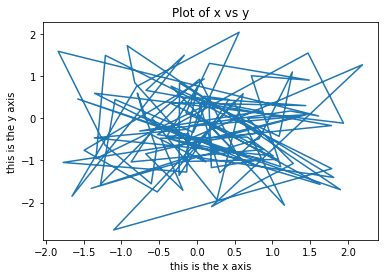

In [41]:
# np.random.seed(200) # This random seed has to be used in each numpy cell after
x_plot1 = stats.norm
y_plot1 = stats.norm 
# numpy_randomGen = Generator(PCG64(scipy_seed)) # Both random gen things have to be in the same cell as the rvs
# y_scipy_rs.random_state = numpy_randomGen
x_plot1_rs_vec = x_plot1.rvs(
                            loc=0, 
                            scale=1, 
                            size=100
                            )

y_plot1_rs_vec = y_plot1.rvs(
                            loc=0, 
                            scale=1, 
                            size=100
                            )         

plt.xlabel("this is the x axis")
plt.ylabel('this is the y axis')
plt.title("Plot of x vs y")
plt.plot(x_plot1_rs_vec,y_plot1_rs_vec)
plt.show()

If we wanted to export the plot as a file, we can do that by using ```matplotlit.pyplot.savefig``` https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.savefig.html 

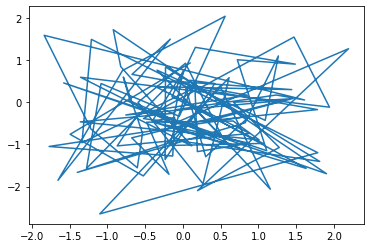

In [43]:
plt.plot(x_plot1_rs_vec,y_plot1_rs_vec)

pdf_fp = "../data/first_plot_demo.png"
plt.savefig(fname=pdf_fp)

The `numpy` function `arange` can be used to create a sequence of numbers. `np.arange(a,b)` will make a vector of integers between a and b, including a but excluding b.

In [44]:
x = np.arange(1,11)
print(x)

[ 1  2  3  4  5  6  7  8  9 10]


The `matplotlib` function `contour` can be used to create contour plots in order to represent three-dimensional data. https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.contour.html?highlight=contour#matplotlib.pyplot.contour.

It requires the following parameters:
```contour([X, Y, ] Z)```
where X and Y must both be 2D with the same shape as Z or they must both be 1-D such that `len(X) == N` is the number of columns in Z and `len(Y) == M` is the number of rows of Z. They must also be ordered monotonically.

In [45]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, data=None, **kwargs)
    Plot contour lines.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == N`` is the number of columns in *Z* and
        ``len(Y) == M`` is the number of rows in *Z*.
    
        *X* and *Y* must both be ordered monotonically.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(N)``, ``Y = range(M)``.
    
    Z : (M, N) array-like
        The height values over which t

In [60]:
x = np.arange(1,11)
y = np.arange(1,11)
z = np.cos(y.reshape(-1,1)) / (1+np.power(x,2))

In [61]:
print("x: " + str(x.shape))
print("y: " + str(y.shape))
print("z: " + str(z.shape))

x: (10,)
y: (10,)
z: (10, 10)


In [62]:
print(y)

[ 1  2  3  4  5  6  7  8  9 10]


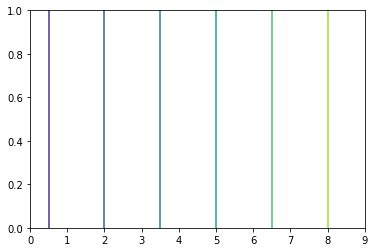

In [63]:
plt.contour([x, y]);

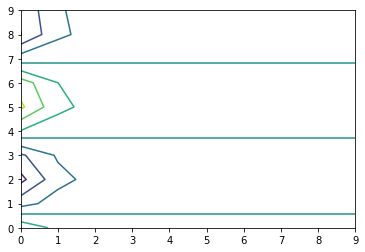

In [56]:
plt.contour(z);

In [65]:
x = np.linspace(-np.pi, np.pi, 50)
print(x)

[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]


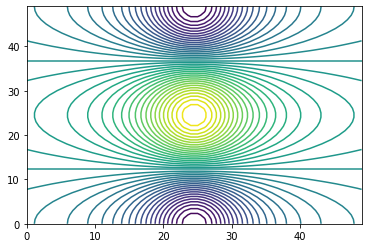

In [66]:
x = np.linspace(-np.pi, np.pi, 50)
y = x.reshape(-1,1)
f = np.cos(y) / (1+np.power(x,2))
plt.contour(f, levels=45);

### 2.3.3 Indexing Data

In [75]:
A = np.arange(1,17).reshape(4, 4).T
A

# Keep in mind, Python/numpy indices start at 0, and chooses to fill rows then columns

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

Then typing

In [77]:
A[1,2]

10

This calls the element in the in 2nd row and 3rd column. The first number after the open bracket symbol is the row, and the second number is the column. 

I am not sure if mastering this syntax of extracing sub arrays from an array is worth the time investment, so I am electing to skip most of this section after burning a lot of time in it.

In [98]:
A[[0,1], :]

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14]])

In [97]:
A[:, [0,1]]

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [99]:
A[0]

array([ 1,  5,  9, 13])

In [103]:
A.shape

(4, 4)

### 2.3.4 Loading Data

If we are trying to load data into Python, we should be using the `pandas` library to import data into a dataframe, which is paralleled with R tables.

We can use `pandas.read_csv()` to do this and export the data as `pandas.DataFrame.to_csv`

Let's import the `Auto` dataset and store it in a dataframe.

In [104]:
import pandas as pd

In [107]:
auto_fp = "../data/Auto.csv"
auto = pd.read_csv(auto_fp)

The `head(n)` function for a dataframe can display the headers and n rows of the dataframe (n defaults to 5)

In [108]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


`auto.csv` is simply a comma separated values file. You can open it in a variety of other programs and it may be good aidea to read it in something besides pandas first.

pandas by default assumes the first row is a header row, so in contrast to the R lab, the first row is loaded correctly, although there is still missing data...

Because we are using the csv, there is no specific marker for missing data like in the demo. We can do a search for the string "?" but the code is not as elegant as demonstrated.

In [122]:
for col in auto.columns:
    if auto[auto[col] == "?"].shape[0] > 0:
        print(col, auto[auto[col] == "?"].shape[0])
        print(auto[auto[col] == "?"])

horsepower 5
      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
32   25.0          4          98.0          ?    2046          19.0    71   
126  21.0          6         200.0          ?    2875          17.0    74   
330  40.9          4          85.0          ?    1835          17.3    80   
336  23.6          4         140.0          ?    2905          14.3    80   
354  34.5          4         100.0          ?    2320          15.8    81   

     origin                  name  
32        1            ford pinto  
126       1         ford maverick  
330       2  renault lecar deluxe  
336       1    ford mustang cobra  
354       2           renault 18i  


Like with numpy, we can use the `shape` attribute to tell us how many observations and columns there are in the data.

In [124]:
auto.shape

(397, 9)

We can use dataframe indexing to drop the rows with this missing value

In [125]:
cleaned = auto[auto['horsepower'] != '?']
cleaned.shape

(392, 9)

We can use the `columns` attribute to give us the names of the columns

In [129]:
cleaned.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

You can use that in combination with the `tolist()` function to output a Python list that prints a little cleaner but with less detail

In [130]:
cleaned.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

### Additional Graphical and Numerical Summaries

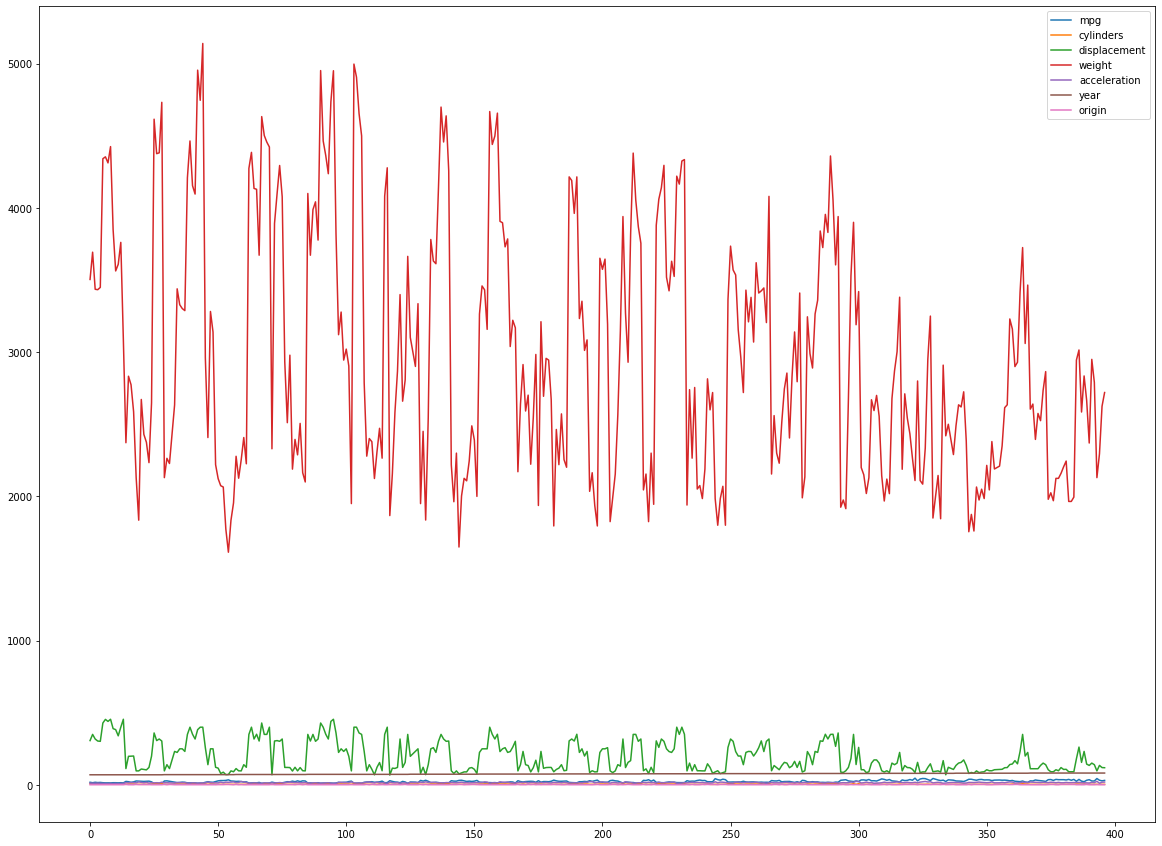

In [132]:
cleaned.plot(figsize=(20,15));

Interestingly, `horsepower` was not plotted even though it is numerical. Why?

In [133]:
cleaned['horsepower'].describe()

count     392
unique     93
top       150
freq       22
Name: horsepower, dtype: object

Because upon import, pandas converted all values in the `horsepower` column into objects (here strings) because of the missing data which were all in '?' form. We can convert the cleaned `horsepower` column back to a numerical value if we want.

To refer to a variable, we must type the dataframe and column/variable name inside either `[]` or with `loc` or with `.{name}`. Here the `cylinders` variable is stored as a numeric type but it may be more useful to treat it as a qualitative or categorical variable. We can use the `astype()` function to convert variables into different data types.

In [134]:
help(pd.DataFrame.astype)

Help on function astype in module pandas.core.generic:

astype(self: 'NDFrameT', dtype, copy: 'bool_t' = True, errors: 'str' = 'raise') -> 'NDFrameT'
    Cast a pandas object to a specified dtype ``dtype``.
    
    Parameters
    ----------
    dtype : data type, or dict of column name -> data type
        Use a numpy.dtype or Python type to cast entire pandas object to
        the same type. Alternatively, use {col: dtype, ...}, where col is a
        column label and dtype is a numpy.dtype or Python type to cast one
        or more of the DataFrame's columns to column-specific types.
    copy : bool, default True
        Return a copy when ``copy=True`` (be very careful setting
        ``copy=False`` as changes to values then may propagate to other
        pandas objects).
    errors : {'raise', 'ignore'}, default 'raise'
        Control raising of exceptions on invalid data for provided dtype.
    
        - ``raise`` : allow exceptions to be raised
        - ``ignore`` : suppress 

In [135]:
cleaned['cylinders'] = cleaned['cylinders'].astype('object')

/tmp/ipykernel_1055/3398832497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['cylinders'] = cleaned['cylinders'].astype('object')


In [136]:
cleaned['horsepower'] = cleaned['horsepower'].astype('float64')

/tmp/ipykernel_1055/3394880548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['horsepower'] = cleaned['horsepower'].astype('float64')


In [138]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    object 
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


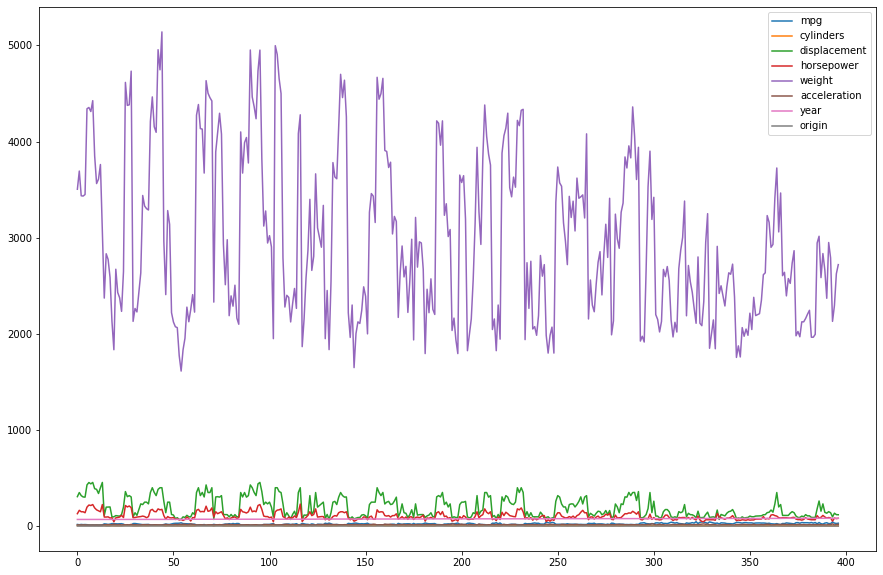

In [140]:
cleaned.plot(figsize=(15,10));

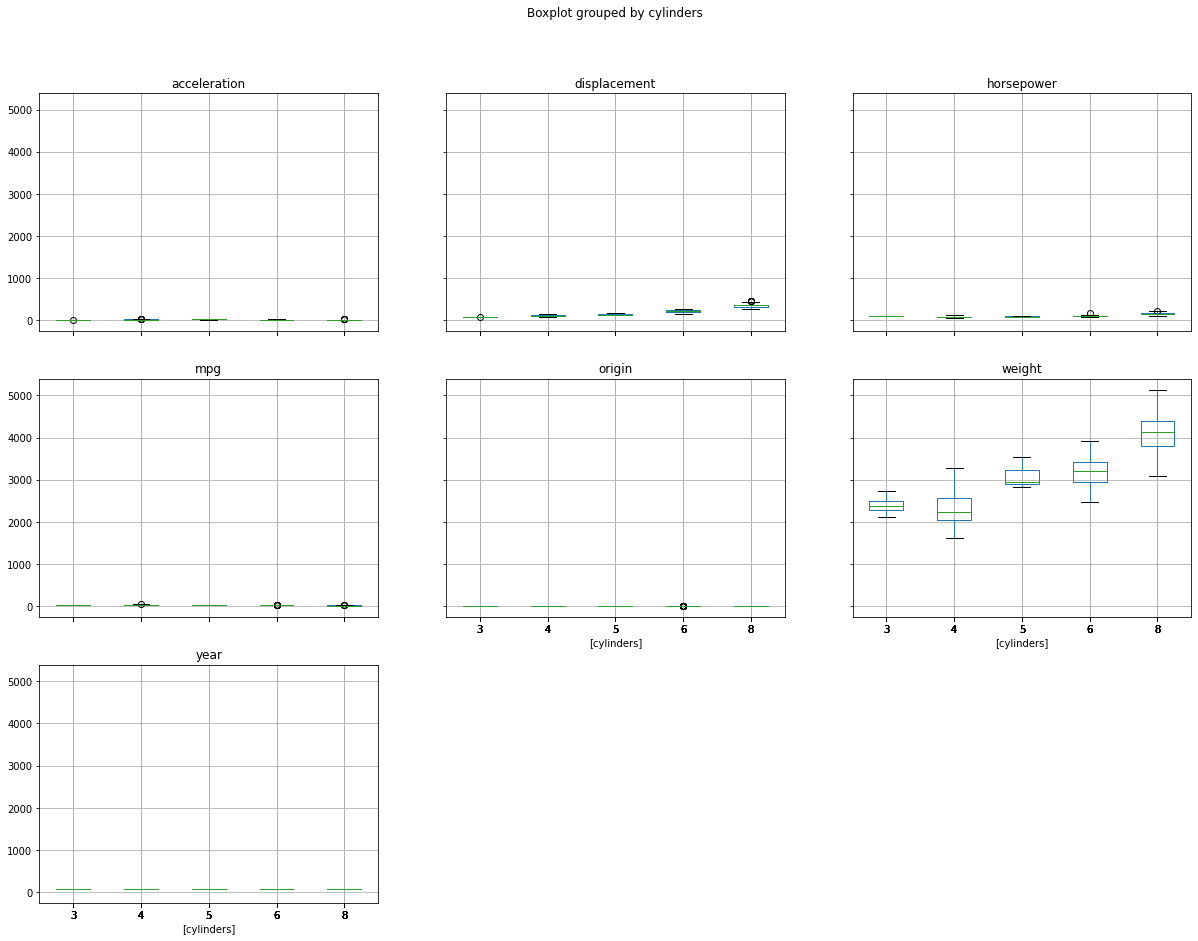

In [146]:
cleaned.boxplot(by=['cylinders'],figsize=(20,15));

We can also make histograms with `DataFrame.hist`

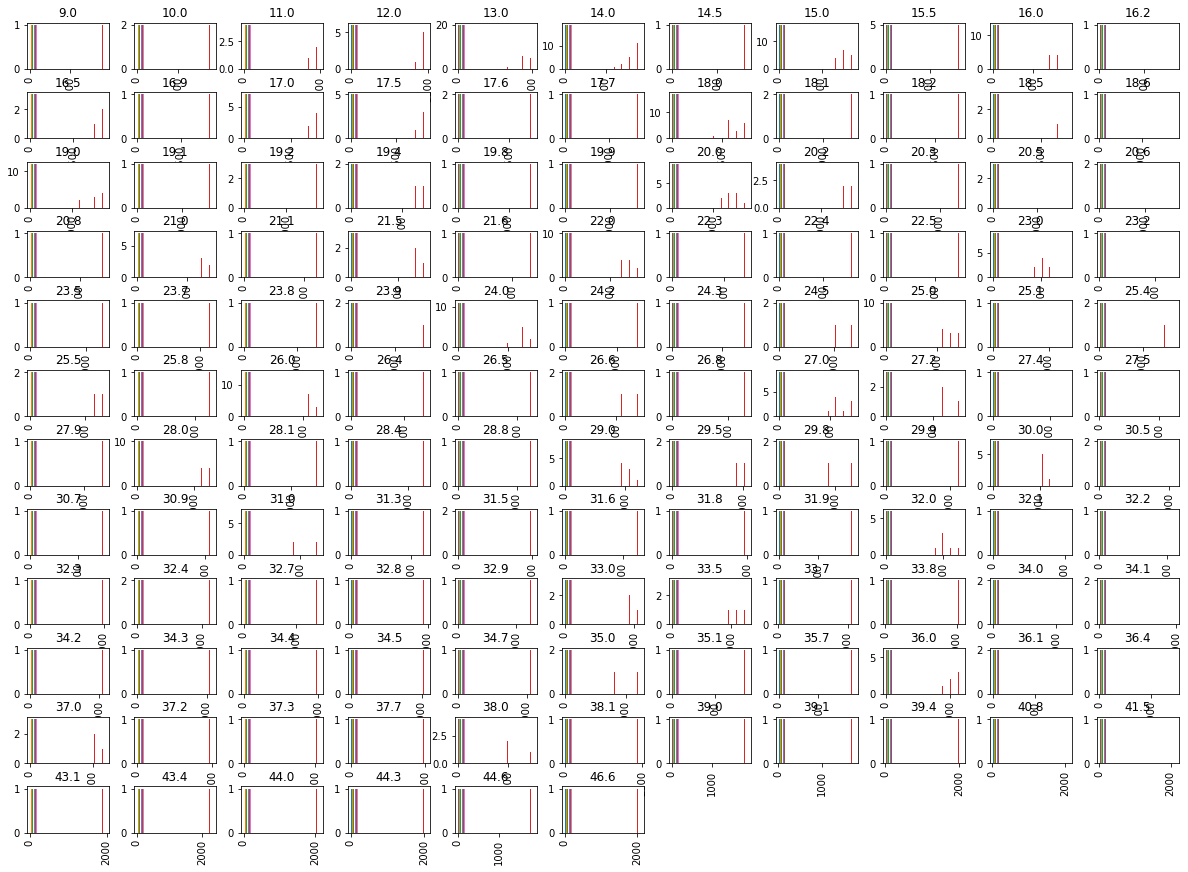

In [148]:
cleaned.hist(by=['mpg'], figsize=(20,15));

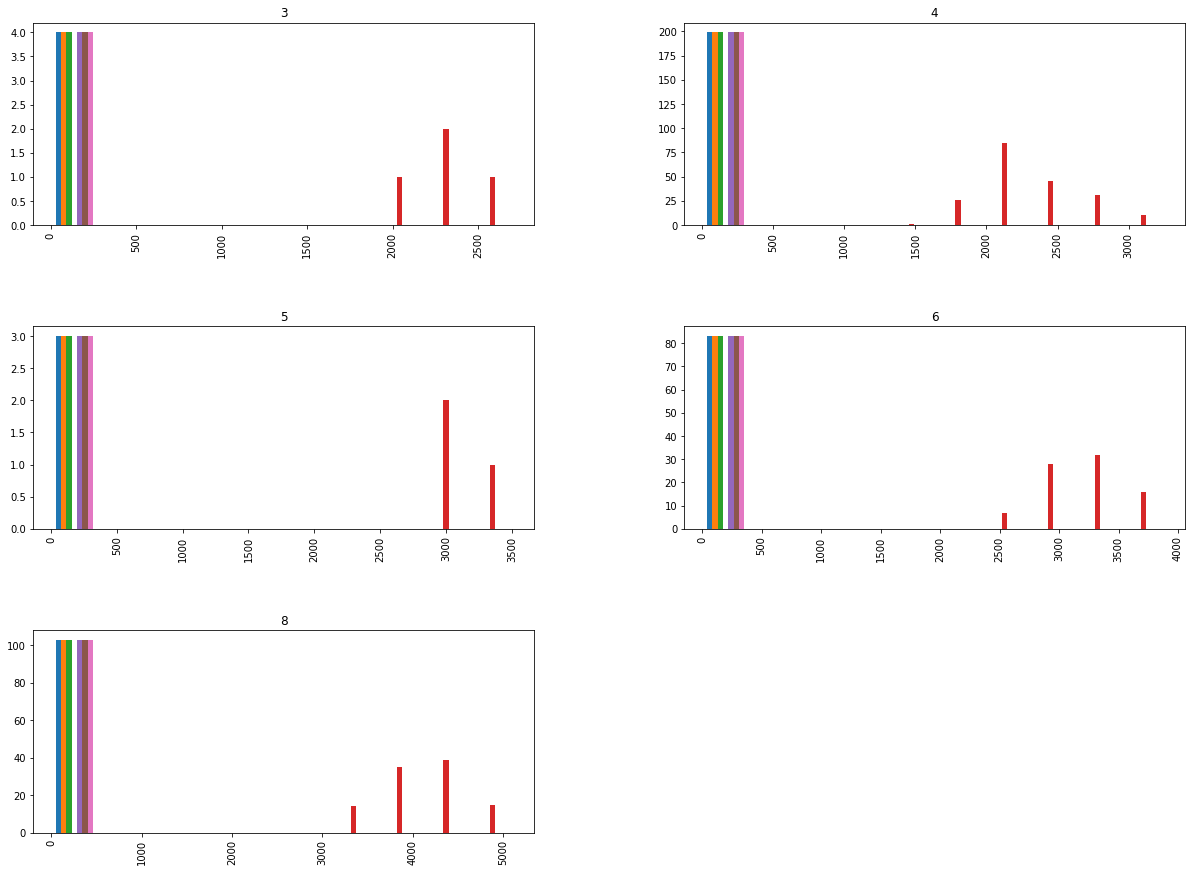

In [152]:
cleaned.hist(by=['cylinders'], figsize=(20,15));

You can also use the `DataFrame.plot.scatter` function to make scatterplots

In [151]:
help(pd.DataFrame.plot.scatter)

Help on function scatter in module pandas.plotting._core:

scatter(self, x, y, s=None, c=None, **kwargs)
    Create a scatter plot with varying marker point size and color.
    
    The coordinates of each point are defined by two dataframe columns and
    filled circles are used to represent each point. This kind of plot is
    useful to see complex correlations between two variables. Points could
    be for instance natural 2D coordinates like longitude and latitude in
    a map or, in general, any pair of metrics that can be plotted against
    each other.
    
    Parameters
    ----------
    x : int or str
        The column name or column position to be used as horizontal
        coordinates for each point.
    y : int or str
        The column name or column position to be used as vertical
        coordinates for each point.
    s : str, scalar or array-like, optional
        The size of each point. Possible values are:
    
        - A string with the name of the column to be 

As far as I know, there is no `matplotlib` equivalent to R's `identify` function to click/interact with individual points on a plot. This may need something like `plotly` for interactive capability https://plotly.com/python/ 

For dataframes, you can use the `describe()` function to display summary statistics for numerical data.

In [153]:
help(pd.DataFrame.describe)

Help on function describe in module pandas.core.generic:

describe(self: 'NDFrameT', percentiles=None, include=None, exclude=None, datetime_is_numeric=False) -> 'NDFrameT'
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ig

In [154]:
cleaned.describe()

,mpg,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Unlike with R's `summary` function, qualitative columns will not be included in `describe()` results. For those, you can use something like `value_counts()`

In [155]:
cleaned['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [156]:
cleaned['name'].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: name, Length: 301, dtype: int64

You can also use the `describe()` function on individual variables

In [157]:
cleaned['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

With a Jupyter Notebook like this one, all of the variables and commands will clear once the kernel is shut down. Depending on how you are using/working with the notebook, this can occur when the file is closed or when the kernel is shutdown (either by closing or restarting the kernel directly or shutting down the Jupyter server).

However, when written linearly with all steps and executions in order, one can do a run all/execute all command to run all code cells from top to bottom. As long as `random_seed` is set, the results should be the same every time.